Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



In [1]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,1,1000)
w1=1
w0=10
# write your equation here
y=# insert the code for the given equation here

plt.plot(x,y)


SyntaxError: invalid syntax (<ipython-input-1-4c08b97c1423>, line 8)

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

(1000,)


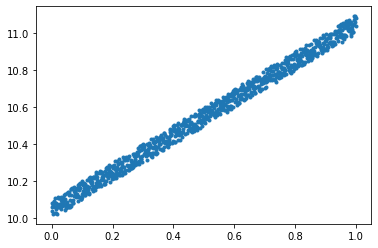

In [ ]:
rnd_nos=np.random.random(y.shape)
y_cor= # insert your code here #(y+0.1*random noise)
print(rnd_nos.shape)
plt.plot(x,y_cor,'.')

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

[[1.07807808]]


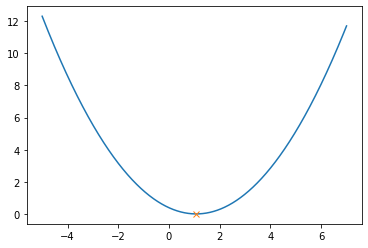

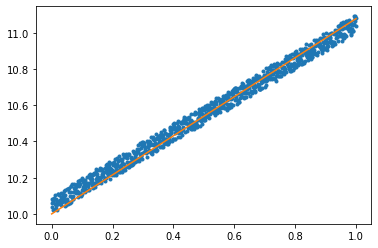

In [ ]:
# implementation of heurastic search for 1 variable case
def hurestic_srch(x,y_cor):
  srch_w1=np.linspace(-5,7,1000)
  srch_w1=np.expand_dims(srch_w1,axis=1)
  x=np.expand_dims(x,axis=1)


  y_pred=srch_w1 @ x.T+w0    # @ used for matrix multiplication , */np.multiply point wise multiplication, ## for array type initialization
  #print(x.shape)


  y_cor_rep=np.tile(y_cor,(x.shape[0],1))
  #print(y_cor_rep.shape)

  error=np.sum((np.power((y_cor_rep-y_pred),2)),axis=1)/(x.shape[0]) # row wise sum

  #print(error.shape)
  idx = np.where(error == np.min(error))
  w1_opt=srch_w1[idx]
  return w1_opt,error,srch_w1,idx

w1_opt,error,srch_w1,idx=# insert your code here (call hurestic srch function)

print(w1_opt)

# error surface plot
plt.plot(srch_w1,error)
plt.plot(w1_opt,error[idx],'x')
plt.figure()
# ploting
#print(x.shape)
y_bestpred=w1_opt*x+w0
#print(y_bestpred.shape)
plt.plot(x,y_cor,'.')
plt.plot(x,y_bestpred.T)



d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

1.0740457320045673


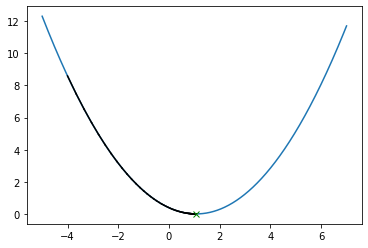

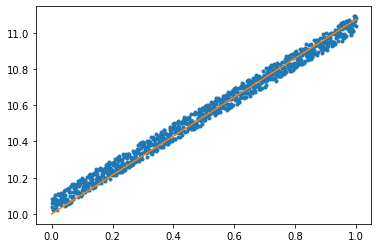

In [ ]:
import matplotlib.pyplot as plt

def f(w1):
  return (w1*x+w0)

# Gradient computation 
def grad_computation(y_actual, w1_old, lr, x):
    w1_new = # write your update equation here (hint: y_pred=f(w1_old))
    return w1_new  


def err(w1,y):
    return np.mean(np.power(y-f(w1),2))


# srch_w1=np.linspace(-10,10,1000)
#error=err(srch_w1,y_cor)
# print(error.shape)
plt.figure()
plt.plot(srch_w1,error)
# Gradient descent
w1_init = -4  # initialization
w0 = 10
lr = 0.1  # learning rate (0.1,2)
eps = 0.0000001

for i in list(range(1000)):
    if i == 0:
        w1_old = w1_init
        w1 = grad_computation(y_cor, w1_old, lr, x)
    else:        
        w1_old = w1
        w1 = grad_computation( y_cor, w1_old, lr, x)
  
    dev = np.abs(err(w1,y_cor) - err(w1_old,y_cor))
    # print(dev)
    #plt.plot(w1,err(w1,y_cor),'x')
    plt.plot([w1_old,w1],[err(w1_old,y_cor),err(w1,y_cor)],color='k')
    
    
    if dev <= eps:
        break

print(w1)
plt.plot(w1,err(w1,y_cor),'x',color='g')

plt.figure()
# ploting
#print(x.shape)
y_bestpred=w1*x+w0
#print(y_bestpred.shape)
plt.plot(x,y_cor,'.')
plt.plot(x,y_bestpred)

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

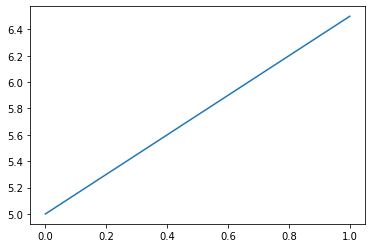

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,1000)
w0 = 5
w1 = 1.5
# write your equation here
y = w1*x + w0
plt.plot(x,y)


b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

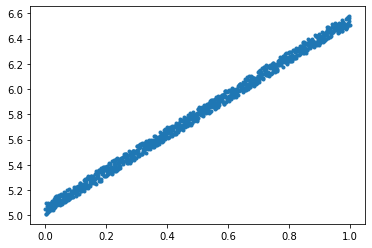

In [ ]:
rnd_nos = np.random.random(y.shape)
y_cor = y + 0.1*rnd_nos
# print(rnd_nos.shape)
plt.plot(x,y_cor,'.')

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

(100, 100)
(100, 100)


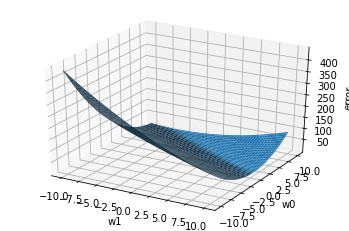

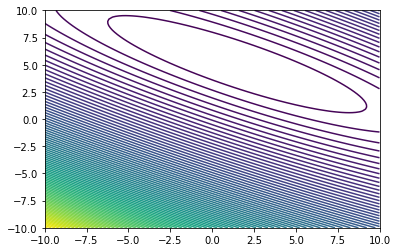

In [ ]:
# c

def f(w1, w0,x):
  return (w1*x + w0)

srch_w1=np.linspace(-10,10,100)
srch_w0=np.linspace(-10,10,100)

S_w1,S_w0=np.meshgrid(srch_w1,srch_w0)
print(S_w1.shape)

def error(w1,w0,x,y):
  if len(w1.shape)==0:
    return np.mean(np.power(y-(f(w1,w0,x)),2))
  else:
    err=np.zeros(w1.shape)
    for x_i,y_i in zip(x,y):
      err1=np.power((np.tile(y_i,w1.shape)-(f(w1,w0,x_i))),2)
      err=err+err1
    return err/x.shape[0]
err=error(S_w1,S_w0,x,y_cor)
print(err.shape)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(S_w1, S_w0, err)
ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_zlabel('error');

plt.figure()
plt.contour(S_w1, S_w0, err,100)





d) Gradient descent:

[5.0547047] [1.48986653]


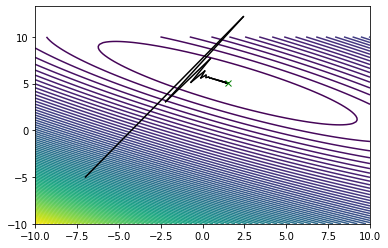

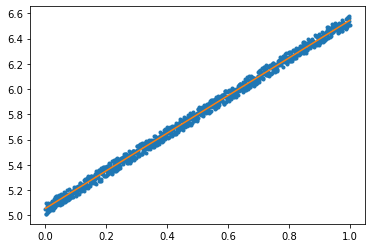

In [ ]:
# Gradient descent
w1_init = -7 # initialization 
w0_init = -5
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001

# Gradient computation 
def grad_computation(y_actual, w0_old, w1_old, lr, x):
    wo_new = # write your update equation (w0_old + lr*avg(2*(y_actual - y_pred)))
    w1_new = # write your update equation (w1_old + lr*avg(2*(y_actual - y_pred)*x))
    return wo_new, w1_new  







plt.figure()
plt.contour(S_w1, S_w0, err,100)



for i in list(range(1000)):
    if i == 0:
        w0_old = np.array([w0_init])
        w1_old = np.array([w1_init])
        y_pred = f(w1_old, w0_old,x)
        w0, w1 = grad_computation(y_cor, w0_old, w1_old, lr, x)
    else:
        w0_old = w0        
        w1_old = w1
        y_pred = f(w1_old, w0_old,x)
        w0, w1 = grad_computation(y_cor, w0_old, w1_old, lr, x)
    
    dev = np.abs(error(w1,w0,x,y_cor) - error(w1_old,w0_old,x,y_cor))
    # # print(dev)
    plt.plot([w1_old,w1],[w0_old,w0],color='k')
    
    if dev <= eps:
        break

print(w0, w1)
plt.plot(w1,w0,'x',color='g')



plt.figure()
# ploting
#print(x.shape)
y_bestpred=w1*x+w0
#print(y_bestpred.shape)
plt.plot(x,y_cor,'.')
plt.plot(x,y_bestpred)

#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

(900,)


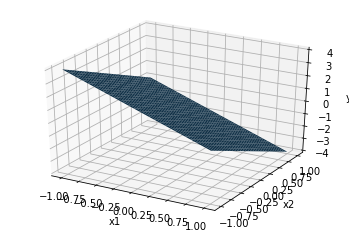

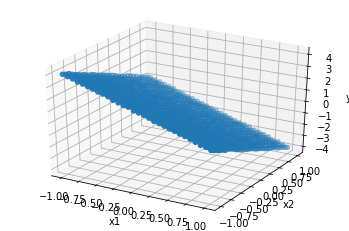

In [ ]:
# data generation
x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)

# equation of plane

w0=0
w1=-2
w2=-2

y= # write the equation of plane here

# plot of plane
X1,X2=np.meshgrid(x1,x2)

Y=#write the equation of plane here


plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

# corupt the data using random noise

rand=np.random.uniform(0,1,Y.shape)
Y_cor=Y+0.1*rand

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y_cor,'.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

# generated corrupted data points
x1=X1.flatten()
x2=X2.flatten()
y_cor=Y_cor.flatten()

print(x1.shape)


b) Error surface

(100, 100)
(100, 100)


Text(0, 0.5, 'w1')

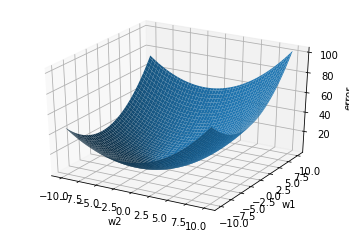

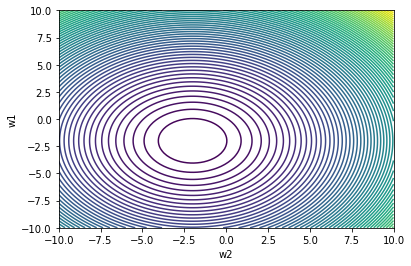

In [ ]:
def f(w2,w1,w0,x1,x2):
  return (w0+w1*x1+w2*x2)

srch_w2=np.linspace(-10,10,100)
srch_w1=np.linspace(-10,10,100)

S_w2,S_w1=np.meshgrid(srch_w2,srch_w1)
print(S_w1.shape)

def error(w2,w1,w0,x1,x2,y):
  if len(w1.shape)==0:
    return np.mean(np.power(y-(f(w2,w1,w0,x1,x2)),2))
  else:
    err=np.zeros(w1.shape)
    for x1_i,x2_i,y_i in zip(x1,x2,y):
      #print(w1.shape)
      err1=np.power((np.tile(y_i,w1.shape)-(f(w2,w1,w0,x1_i,x2_i))),2)
      err=err+err1
    return err/x1.shape[0]
err=error(S_w2,S_w1,w0,x1,x2,y_cor)
print(err.shape)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(S_w2,S_w1,err)
ax.set_xlabel('w2')
ax.set_ylabel('w1')
ax.set_zlabel('error');

plt.figure()
plt.contour(S_w2, S_w1, err,100)
plt.xlabel('w2')
plt.ylabel('w1')

c) Gradient descent:

[-2.00083583] [-1.99902039]


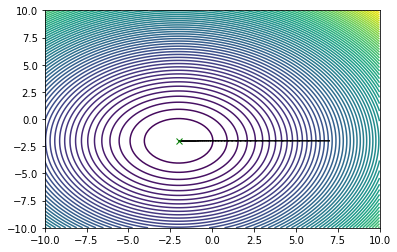

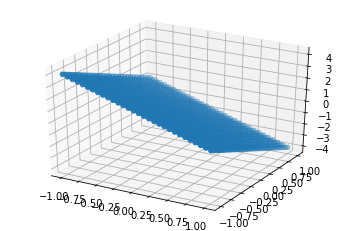

In [ ]:
# Gradient descent
w2_init = 7 # initialization 
w1_init = -2
lr = 0.1  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.0000001

# Gradient computation 
def grad_computation(y_actual, w2_old, w1_old,w0, lr, x1,x2):
    w2_new = # write your update equation
    w1_new = # write your update equation
    return w2_new, w1_new  







plt.figure()
plt.contour(S_w2, S_w1, err,100)



for i in list(range(10000)):
    if i == 0:
        w2_old = np.array([w2_init])
        w1_old = np.array([w1_init])
        w2, w1 = grad_computation(y_cor, w2_old, w1_old,w0, lr, x1,x2)
    else:
        w2_old = w2        
        w1_old = w1
        w2, w1 = grad_computation(y_cor, w2_old, w1_old,w0, lr, x1,x2)
    
    dev = np.abs(error(w2,w1,w0,x1,x2,y_cor) - error(w2_old,w1_old,w0,x1,x2,y_cor))
    # # print(dev)
    plt.plot([w2_old,w2],[w1_old,w1],color='k')
    
    if dev <= eps:
        break

print(w2, w1)
plt.plot(w2,w1,'x',color='g')


# final surface plot
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y_cor,'.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

y_bestpred=w0+w1*X1+w2*X2

ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, y_bestpred,'.')




# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.0490242 ]
 [1.9998412 ]
 [2.99827382]
 [5.00088607]
 [9.0012772 ]
 [2.99881619]]
[[1.0489947 ]
 [1.98690233]
 [2.99364713]
 [4.99021553]
 [8.98736351]
 [2.99235975]]


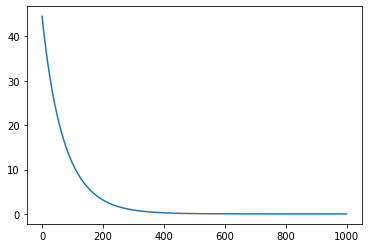

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w= # write your update equation here
    return w

  def error(self,w,y,x):
    return np.mean(np.power((y-x.T @ w),2))

  def mat_inv(self,y,x_aug):
    return # write your equation here
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    err=[]
    for i in range(1000):
      if i==0:
        w_init=np.random.uniform(-1,1,(x_aug.shape[0],1))
        w_old=w_init
        w_pred=self.grad_update(w_old,lr,y,x_aug)
      else:
        w_old=w_pred
        w_pred=self.grad_update(w_old,lr,y,x_aug)
  
      err.append(self.error(w_pred,y,x_aug))
      dev=np.abs(self.error(w_pred,y,x_aug)-self.error(w_old,y,x_aug))
          # print(i)
      if dev<=0.000001:
        break

    return w_pred,err


############################################################################################################
# Generation of data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

# # augment feat

x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


y=x_aug.T @ w  # vector multiplication
print(y.shape)


## corrupted by noise
nois=np.random.uniform(0,1,y.shape)
y=y+0.1*nois

### the data (x_aug and y is generated)#####
###############################################################################################################
# by computation (Normal equation)
reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# by Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)
  

    

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

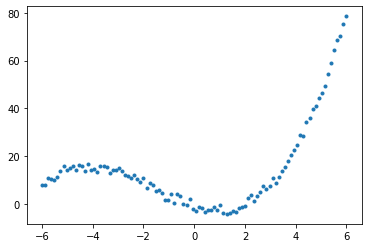

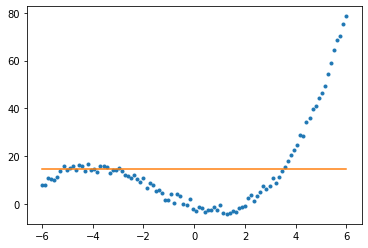

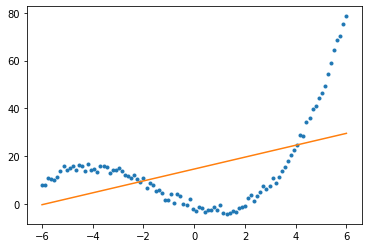

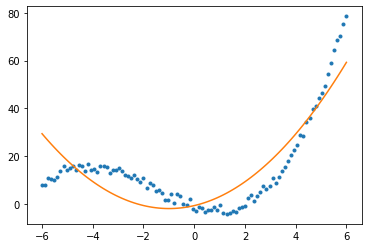

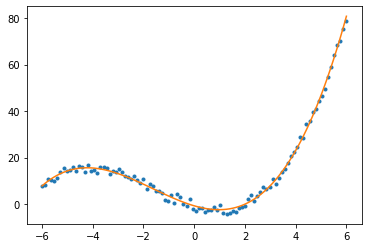

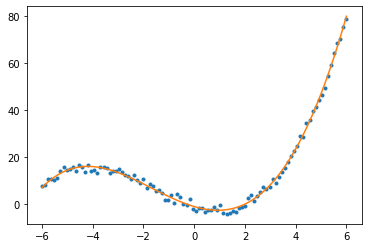

In [ ]:
## data generation

x=np.linspace(-6,6,100)
# print(x.shape)
x=x[np.newaxis,:]
# print(x.shape)


w=np.array([[-3],[-3],[1.25],[0.25]])
# print(w.shape)

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new


X=data_transform(x,3)

y=X.T @ w

y=y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# by computation

# for degree 0 polynomial fitting
degree=0
X_1=data_transform(x,degree)
# print(X_1.shape)
w_mat=reg.mat_inv(y,X_1)
# print(y.shape)
# print(w_mat.shape)
y_pred=# insert your code here X^T x W
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 1 polynomial fitting
degree=1
X_1=data_transform(x,degree)
# print(X_1.shape)
w_mat=reg.mat_inv(y,X_1)
# print(y.shape)
# print(w_mat.shape)
y_pred=# insert your code here X^T x W
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 2 polynomial fitting
degree=2
X_1=data_transform(x,degree)
# print(X_1.shape)
w_mat=reg.mat_inv(y,X_1)
# print(y.shape)
# print(w_mat.shape)
y_pred=# insert your code here X^T x W
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 3 polynomial fitting
degree=3
X_1=data_transform(x,degree)
# print(X_1.shape)
w_mat=reg.mat_inv(y,X_1)
# print(y.shape)
# print(w_mat.shape)
y_pred=# insert your code here X^T x W
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 4 polynomial fitting
degree=4
X_1=data_transform(x,degree)
# print(X_1.shape)
w_mat=reg.mat_inv(y,X_1)
# print(y.shape)
# print(w_mat.shape)
y_pred=# insert your code here X^T x W
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# xx=np.linalg.pinv((X_1 @ X_1.T)) @ X_1 @ y
# print(xx.shape)

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion method (Gradiant descent homework)
4. find the mean square error in test.

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/gdrive')
###### Csv data read
import csv
with open('/gdrive/My Drive/Machine learning workshop blr/Colab_notebooks/salary_pred_data1.csv','rt')as f:
  data = csv.reader(f)
  row1=[]
  for row in data:
        row1.append(row)
        

X=row1[1:]
#print(len(X))
XX=np.zeros((len(X),len(X[0])))

for i in range(len(X)):
    XX[i,:]=X[i]
    

X=XX.T
# print(X.shape)
#########   train test separation ################

train_data=X[:,0:900]
test_data=X[:,900:]

x_train=train_data[0:5,:]
y_train=train_data[5,:]
y_train=y_train.T
y_train=y_train[:,np.newaxis]
# print(x_train.shape)

x_test=test_data[0:5,:]
y_test=test_data[5,:]
y_test=y_test.T
y_test=y_test[:,np.newaxis]
# print(x_test.shape)


# augment data ###########

x_train=np.concatenate((np.ones((1,x_train.shape[1])), x_train),axis=0)
# print(x_train.shape)

reg=regression()

# by computation ##############

w_pred=# insert your code here (training, call reg function)

# print(w_pred)

error=reg.error(w_pred,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)

print('Normalized training error=',error,'\n')

# testing  ###################

def aug(x):
  return np.concatenate((np.ones((1,x.shape[1])), x),axis=0) 

y_pred= #insert your code here (aug(x)^T x w_pred)

# mean square error (testing) (normalized) #############

error=reg.error(w_pred,y_test,aug(x_test))/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized testing error=',error,'\n')

print('predicted salary=',y_pred[0:3],'\n')
print('actual salary=',y_test[0:3])



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
Normalized training error= 0.02827224237168212 

Normalized testing error= 0.05534340421775587 

predicted salary= [[33469.35497582]
 [52694.83918006]
 [58642.13537189]] 

actual salary= [[28084.]
 [48940.]
 [62952.]]


In [ ]:
# Showing the testing prediction

plt.plot(y_test) # using actual data
plt.plot(y_pred,'k') # using predicted data

# Use standard scikit tool to perform linear regression.

1. Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
print(x_train)
print(y_train.shape)

In [ ]:
reg_scikit = LinearRegression()

In [ ]:
reg_scikit.fit(x_train.T,y_train)
w_opt=reg_scikit.coef_
print(w_opt.T)

In [ ]:
# testing  ###################

def aug(x):
  return np.concatenate((np.ones((1,x.shape[1])), x),axis=0) 

y_pred=reg_scikit.predict(aug(x_test).T)

plt.plot(y_test) # using actual data
plt.plot(y_pred,'k') # using predicted data
